Assigmet: githu p project ka accces kese dege 

## Parts of EDA

In [1]:
# # Data Type
# 1. Numerical data ==> Continuous Data ==> age(year, month, days) ,height  weight etc
# 2 categorial data ==> descrete data ==> Total no of employee

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns  # matplotlib updated version is seaborn 

In [3]:
df =pd.read_csv('titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1. Univariate Analysis

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

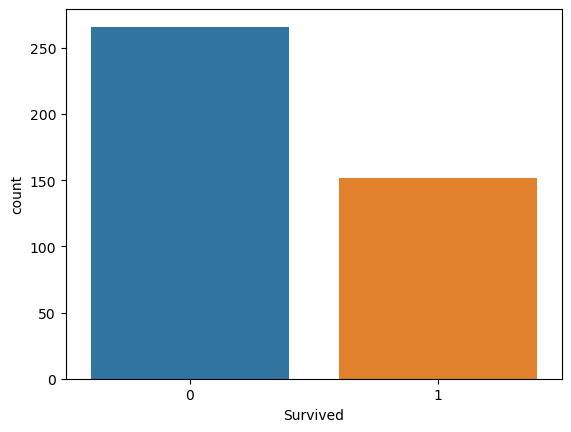

In [9]:
sns.countplot(x=df['Survived'])

In [11]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: >

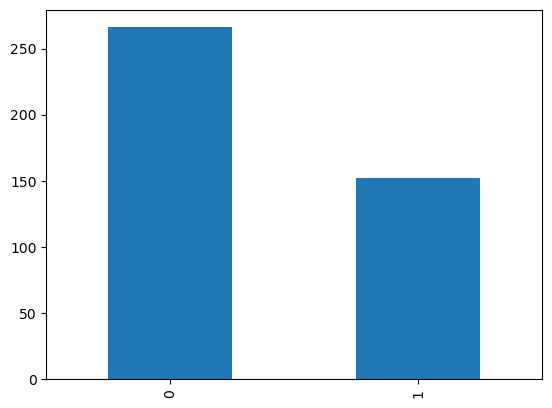

In [6]:
df['Survived'].value_counts().plot(kind= 'bar')

In [13]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

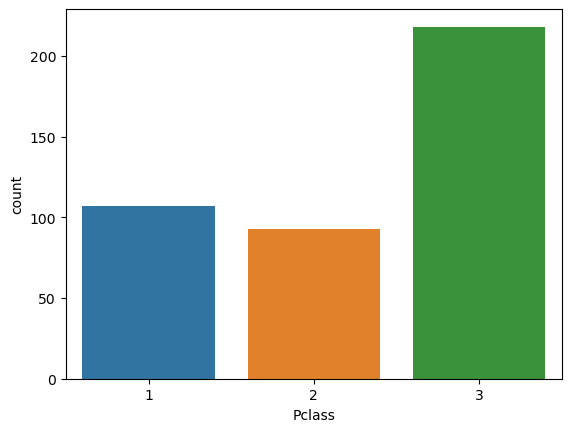

In [14]:
sns.countplot(x=df['Pclass'])

<Axes: ylabel='Survived'>

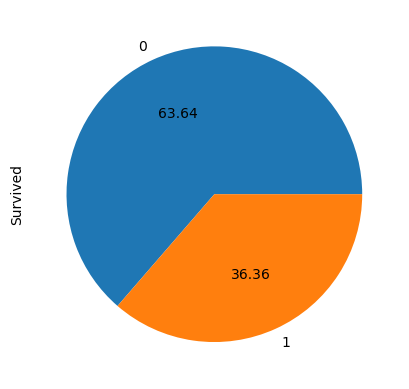

In [8]:
df['Survived'].value_counts().plot(kind='pie', autopct = '%.2f')

<Axes: ylabel='Pclass'>

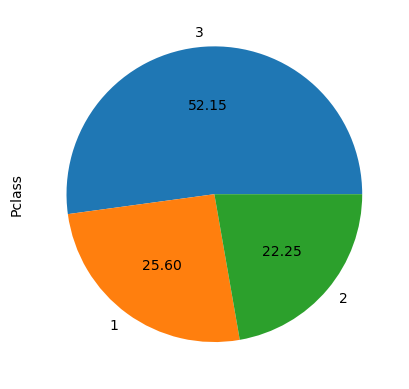

In [17]:
df['Pclass'].value_counts().plot(kind='pie', autopct = '%.2f')

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

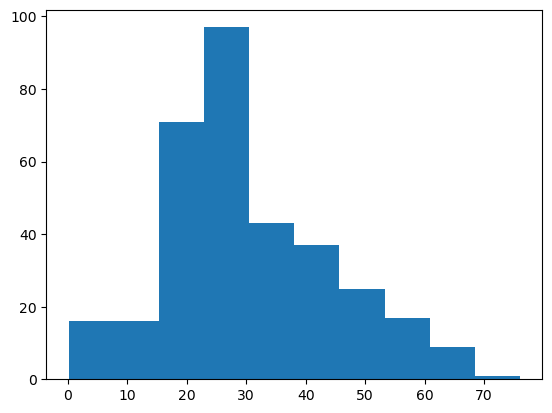

In [18]:
plt.hist(x=df['Age'])

### 3. Box Plot

In [21]:
# x= 1,2,3,4,5
# mean= 1+2+3+4+5 / 5 = 15/5 = 3 

# x= 1,2,3,4,5,100               ## here 100 is outlier
# mean= 15+100 / 6 = 115/6 = 19.3 



<Axes: xlabel='Age'>

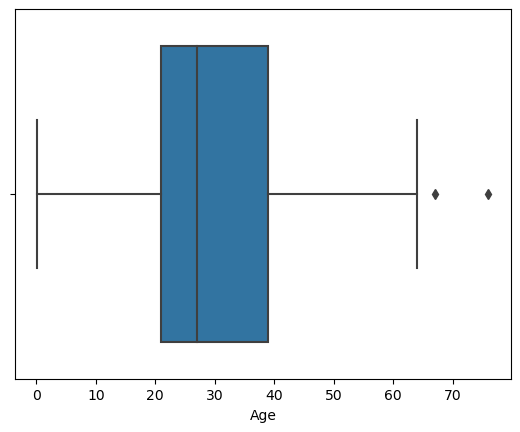

In [19]:
sns.boxplot(x=df['Age'])

In [22]:
tips = sns.load_dataset('tips')

In [23]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Bivariate Analysis

In [24]:
# 1. scatterplot (Numerical column - Numerical column)

<Axes: xlabel='total_bill', ylabel='tip'>

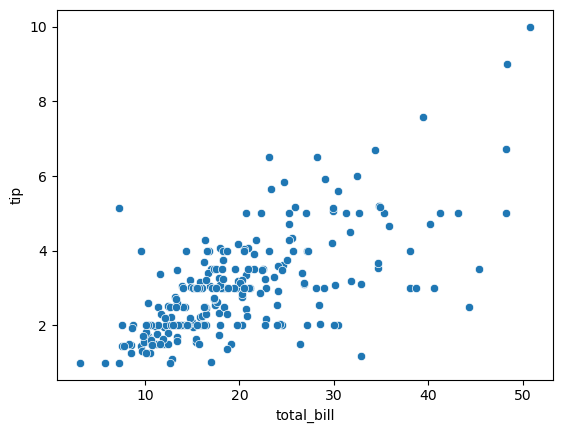

In [25]:
sns.scatterplot(x= tips['total_bill'] , y= tips['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

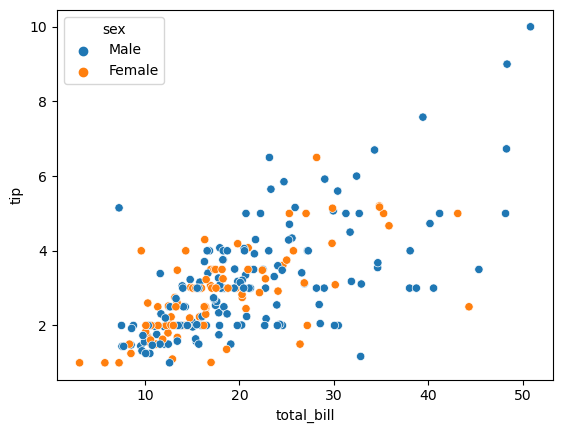

In [28]:
sns.scatterplot(x= 'total_bill'  , y= 'tip', data =tips , hue =tips['sex'])

<Axes: xlabel='total_bill', ylabel='tip'>

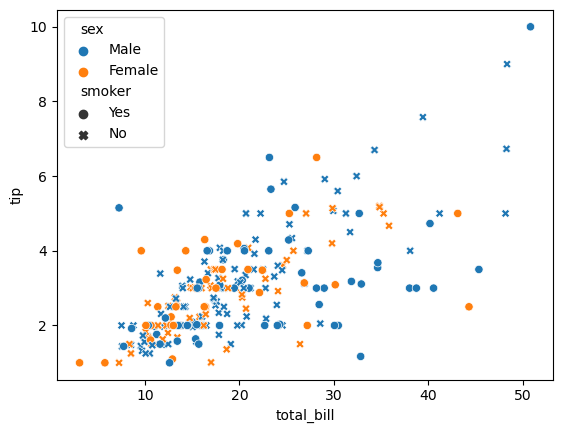

In [29]:
sns.scatterplot(x= 'total_bill'  , y= 'tip', data =tips , hue =tips['sex'] , style= tips['smoker'])

In [31]:
# Heqatmap (categorial - categorial)

p=pd.crosstab(tips['day'], tips['time'])
p

time,Lunch,Dinner
day,,
Thur,61,1
Fri,7,12
Sat,0,87
Sun,0,76


<Axes: xlabel='time', ylabel='day'>

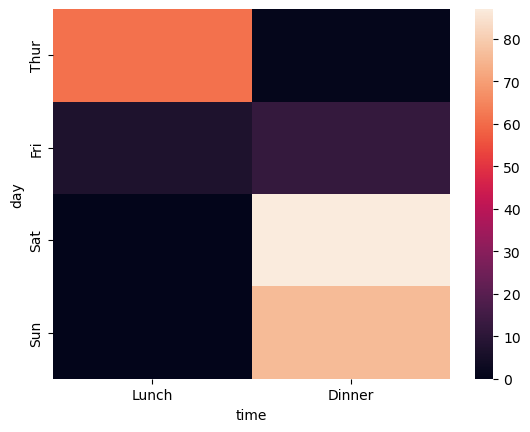

In [33]:
sns.heatmap(p)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [35]:
df1= df.drop(columns= ['Name', 'Sex' , 'Ticket', 'Cabin', 'Embarked'])
df1=df1.dropna()

In [37]:
(df1.groupby('Pclass').mean()['Survived'])

Pclass
1    0.489796
2    0.329545
3    0.344828
Name: Survived, dtype: float64

<Axes: ylabel='Survived'>

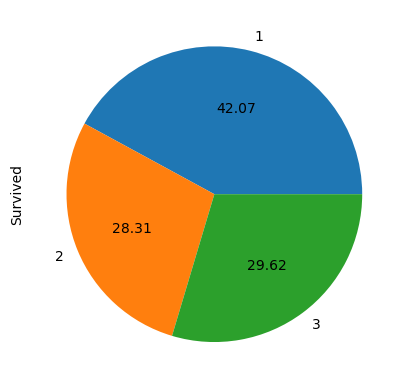

In [36]:
((df1.groupby('Pclass').mean()['Survived']) * 100 ) .plot(kind= 'pie' , autopct = '%.2f')

In [40]:
tips.to_csv('new_tips.csv', index=False)

In [41]:
df2= pd.read_csv('new_tips.csv')
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
df2.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [43]:
df2.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [44]:
df2.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [45]:
df2.sum()

total_bill                                              4827.77
tip                                                      731.58
sex           FemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMa...
smoker        NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
day           SunSunSunSunSunSunSunSunSunSunSunSunSunSunSunS...
time          DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...
size                                                        627
dtype: object

In [47]:
df2.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [48]:
df2.sample(3)

,total_bill,tip,sex,smoker,day,time,size
133,12.26,2.00,Female,No,Thur,Lunch,2
43,9.68,1.32,Male,No,Sun,Dinner,2
26,13.37,2.00,Male,No,Sat,Dinner,2


In [49]:
df2['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [50]:
df3=df2.dropna()

In [51]:
df3

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
